In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import scale

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Visualisation libraries

## Text
from colorama import Fore, Back, Style
from IPython.display import display, Markdown, Latex

## matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
<font size="+2"><b>The Stock Market Data</b></font>
</div>

The Smarket data is part of the the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html). This dataset consists of percentage returns for the S&P 500 stock index over 1, 250 days, from the beginning of 2001 until the end of 2005. This dataset can be extracted from the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html) using the following syntax.


```R
library (ISLR)
write.csv(Smarket, "Smarket.csv")
```

In [2]:
Smarket = pd.read_csv('Data/Smarket.csv', index_col=0)
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Let's divide this dataset into train and test sets. In doing so, the data before 2005 is considered for the train set and the data from 2005 onward for the test set. That is

In [3]:
X_train, y_train = Smarket.loc[(Smarket['Year'] < 2005), ['Lag1','Lag2']], Smarket.loc[(Smarket['Year'] < 2005), ['Direction']]
X_test, y_test = Smarket.loc[(Smarket['Year'] >= 2005), ['Lag1','Lag2']], Smarket.loc[(Smarket['Year'] >= 2005), ['Direction']]

pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
               'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set,X_train,X_test,y_train,y_test
Shape,"(998, 2)","(252, 2)","(998, 1)","(252, 1)"


## K-Nearest Neighbors

Given a positive integer $K$ and a test observation $x_0$, the KNN classifier first identifies the $K$ points in the training data that are closest to $x_0$, represented by $\mathcal{N}_0$.

It then estimates the conditional probability for class $j$ as the fraction of points in $\mathcal{N}_0$ whose response values equal $j$:
$$\mbox{Pr}(Y = j~|~X = x_0)~=~\frac{1}{K}\sum_{i \in \mathcal{N}_0} I \left(y_i = j \right).$$

Finally, KNN applies Bayes rule and classifies the test observation $x_0$ to
the class with the largest probability.

Here we use [**sklearn KNeighbors Classifier**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):

In [4]:
KKN = KNeighborsClassifier(n_neighbors=3)
# Predictions
_ = KKN.fit(X_train, y_train)
y_pred = KKN.predict(X_test)

* **Classification Report:**

In [5]:
Class_Names = list(np.sort(Smarket.Direction.unique()))
Results = pd.DataFrame(classification_report(y_test, y_pred,
                                             target_names=Class_Names, output_dict=True)).T
display(Results.round(2))

,precision,recall,f1-score,support
Down,0.47,0.43,0.45,111.00
Up,0.58,0.61,0.59,141.00
accuracy,0.53,0.53,0.53,0.53
macro avg,0.52,0.52,0.52,252.00
weighted avg,0.53,0.53,0.53,252.00


* **Confusion Matrix**:

A confusion matrix is a table that is often used to describe the performance of a classification model (classifier) on a set of test data, **X_test** and **y_test**.

In [6]:
confusion_matrix(y_test, y_pred)

array([[48, 63],
       [55, 86]], dtype=int64)

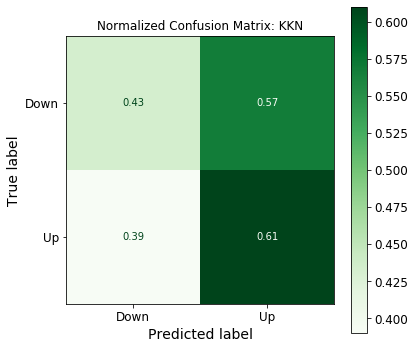

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names,
                      cmap= "Greens", normalize= 'true', ax = ax)
_ = ax.set_title('Normalized Confusion Matrix: KKN')

<div class="alert alert-block alert-info">
<font size="+2"><b>Caravan Insurance Data</b></font>
</div>

The Caravan dataset is part of the the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html). This dataset includes 85 predictors that measure demographic characteristics for 5,822 individuals. This dataset can be extracted from the [**ISLR package**](https://cran.r-project.org/web/packages/ISLR/index.html) using the following syntax.

```R
library (ISLR)
write.csv(Caravan, "Caravan.csv")
```

In [8]:
Caravan = pd.read_csv('Data/Caravan.csv', index_col = 0)
display(Caravan.head())
X = Caravan.drop('Purchase', axis=1).astype('float64')
y = Caravan['Purchase']
# Scaling the data using scikit-learn scale
X = scale(X)

Class_Names = list(np.sort(Caravan.Purchase.unique()))

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


We now split the observations into a test set, containing the first $1,000$ observations, and a training set, containing the remaining observations.

In [9]:
N = int(1e3)
X_train, X_test = X[N:,:], X[:N,:]
y_train, y_test = y[N:], y[:N]
del N

### KNN with K = 1

Confusion Matrix


,No,Yes
No,873,68
Yes,50,9


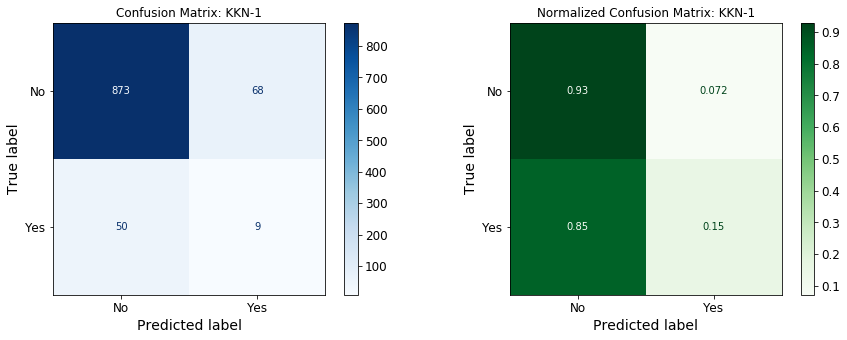

In [10]:
n_neighbors = 1
KKN = KNeighborsClassifier(n_neighbors, weights = 'uniform')
_ = KKN.fit(X_train, y_train)
y_pred = KKN.predict(X_test)
score = KKN.score(X_test, y_test)
print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'Confusion Matrix'  + Style.RESET_ALL)
display(pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = Class_Names, columns = Class_Names))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: KKN-%i' % n_neighbors)

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: KKN-%i' % n_neighbors)

### KNN with K = 3

Confusion Matrix


,No,Yes
No,921,20
Yes,54,5


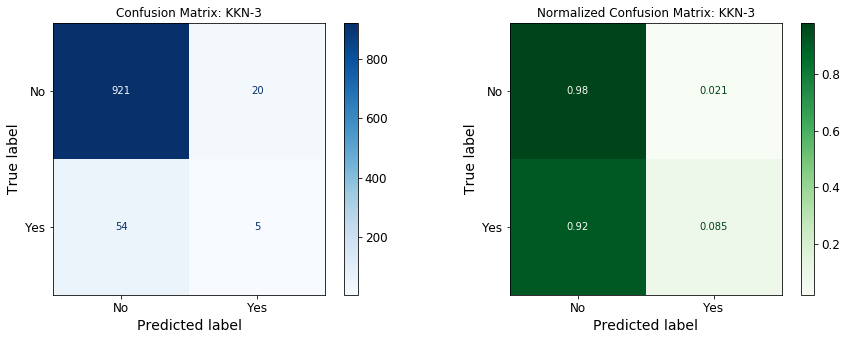

In [11]:
n_neighbors = 3
KKN = KNeighborsClassifier(n_neighbors, weights = 'uniform')
_ = KKN.fit(X_train, y_train)
y_pred = KKN.predict(X_test)
score = KKN.score(X_test, y_test)
print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'Confusion Matrix'  + Style.RESET_ALL)
display(pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = Class_Names, columns = Class_Names))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: KKN-%i' % n_neighbors)

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: KKN-%i' % n_neighbors)

### KNN with K = 5

Confusion Matrix


,No,Yes
No,930,11
Yes,55,4


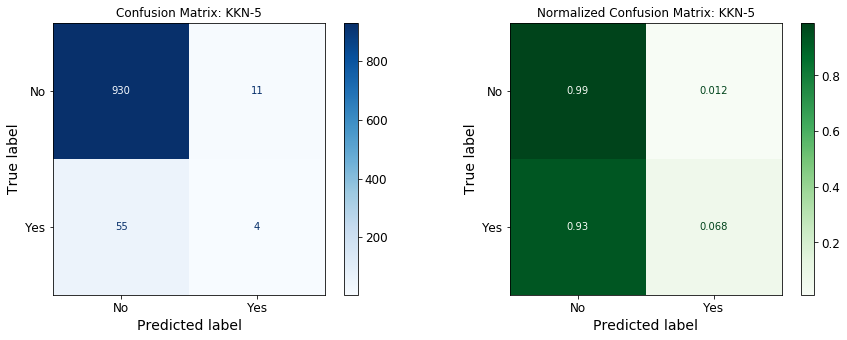

In [12]:
n_neighbors = 5
KKN = KNeighborsClassifier(n_neighbors, weights = 'uniform')
_ = KKN.fit(X_train, y_train)
y_pred = KKN.predict(X_test)
score = KKN.score(X_test, y_test)
print(Back.CYAN + Fore.BLACK + Style.BRIGHT + 'Confusion Matrix'  + Style.RESET_ALL)
display(pd.DataFrame(data = confusion_matrix(y_test, y_pred), index = Class_Names, columns = Class_Names))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Blues", normalize= None, ax = ax[0])
_ = ax[0].set_title('Confusion Matrix: KKN-%i' % n_neighbors)

_ = plot_confusion_matrix(KKN, X_test, y_test, display_labels= Class_Names, cmap= "Greens", normalize= 'true', ax = ax[1])
_ = ax[1].set_title('Normalized Confusion Matrix: KKN-%i' % n_neighbors)

***

## Refrences

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7) (Vol. 112, pp. 3-7). New York: springer.

* Jordi Warmenhoven, [ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). [ISLR: Data for an Introduction to Statistical Learning with Applications in R](https://cran.r-project.org/web/packages/ISLR/index.html)

***